In [1]:
import time
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from package import geometry, triangulation

In [2]:
cube2d = np.array(list(itertools.product([1, -1], repeat=2)))
cube3d = np.array(list(itertools.product([1, -1], repeat=3)))
cube4d = np.array(list(itertools.product([1, -1], repeat=4)))

truncated_octahedron = np.array(list(itertools.permutations([0, 1, 2], 3)))
truncated_octahedron = np.concatenate([truncated_octahedron*np.array(i) for i in itertools.product([1, -1], repeat=3)])
truncated_octahedron = 0.5*np.unique(truncated_octahedron, axis=0)

figures = {'cube2d': cube2d, 
           'cube3d': cube3d, 
           'TrOcth': truncated_octahedron, 
           'cube4d': cube4d, }

for key in figures:
    print(f'{key}: Dimension: {figures[key].shape[1]}; Vertices: {figures[key].shape[0]}')

cube2d: Dimension: 2; Vertices: 4
cube3d: Dimension: 3; Vertices: 8
TrOcth: Dimension: 3; Vertices: 24
cube4d: Dimension: 4; Vertices: 16


# Geometry

In [3]:
matrices_full = {}
hspaces_full = {}
for key in figures:
    figure = figures[key]
    clock = time.perf_counter()
    m_list, h_list = geometry.get_hyperspaces(figure)
    clock = time.perf_counter() - clock
    matrices_full.update({key : m_list.copy()})
    hspaces_full.update({key : [i for i in h_list]})
    print("Hyperspcaes for {0} has been calculated in {1:.4f} seconds.".format(key, clock))

print()
for key in hspaces_full:
    lengths = np.array([len(hspace) for hspace in hspaces_full[key]])
    length2 = []
    for length in np.unique(lengths):
        length2.append(f"Hyperspaces size {length} : {(lengths == length).sum()}")
    msg = f"Figure {key}\nHyperspaces total: {len(lengths)}\n" + '\n'.join(length2) + '\n'
    print(msg)

Hyperspcaes for cube2d has been calculated in 0.0014 seconds.
Hyperspcaes for cube3d has been calculated in 0.0043 seconds.
Hyperspcaes for TrOcth has been calculated in 0.2929 seconds.
Hyperspcaes for cube4d has been calculated in 0.1484 seconds.

Figure cube2d
Hyperspaces total: 4
Hyperspaces size 2 : 4

Figure cube3d
Hyperspaces total: 14
Hyperspaces size 3 : 8
Hyperspaces size 4 : 6

Figure TrOcth
Hyperspaces total: 628
Hyperspaces size 3 : 432
Hyperspaces size 4 : 168
Hyperspaces size 6 : 28

Figure cube4d
Hyperspaces total: 120
Hyperspaces size 4 : 80
Hyperspaces size 6 : 32
Hyperspaces size 8 : 8



In [4]:
matrices = {}
hspaces = {}
for key in figures:
    figure = figures[key]
    clock = time.perf_counter()
    m_list, h_list = geometry.get_hyperspaces_containing(figure)
    clock = time.perf_counter() - clock
    matrices.update({key : m_list.copy()})
    hspaces.update({key : [i for i in h_list]})
    print("Hyperspcaes for {0} has been calculated in {1:.4f} seconds.".format(key, clock))

print()
for key in hspaces:
    lengths = np.array([len(hspace) for hspace in hspaces[key]])
    length2 = []
    for length in np.unique(lengths):
        length2.append(f"Hyperspaces size {length} : {(lengths == length).sum()}")
    msg = f"Figure {key}\nHyperspaces total: {len(lengths)}\n" + '\n'.join(length2) + '\n'
    print(msg)

Hyperspcaes for cube2d has been calculated in 0.0007 seconds.
Hyperspcaes for cube3d has been calculated in 0.0035 seconds.
Hyperspcaes for TrOcth has been calculated in 0.0478 seconds.
Hyperspcaes for cube4d has been calculated in 0.0627 seconds.

Figure cube2d
Hyperspaces total: 2
Hyperspaces size 2 : 2

Figure cube3d
Hyperspaces total: 6
Hyperspaces size 4 : 6

Figure TrOcth
Hyperspaces total: 51
Hyperspaces size 4 : 48
Hyperspaces size 8 : 3

Figure cube4d
Hyperspaces total: 20
Hyperspaces size 6 : 8
Hyperspaces size 8 : 12



In [5]:
halfs = {}
for key in figures:
    figure = np.array(figures[key])
    hspace = hspaces[key]
    lengths = np.array([len(hspc) for hspc in hspace])
    matrix = matrices[key][np.where(lengths == max(lengths))[0][0]]
    clock = time.perf_counter()
    half = geometry.get_half(figure, matrix)
    clock = time.perf_counter() - clock
    halfs.update({key : half})
    print("Half for {0} has been calculated in {1:.4f} seconds.".format(key, clock))
    
print('\nHalfs I got:')
for key in halfs:
    print(f'{key}: Dimension: {halfs[key].shape[1]}; Vertices: {halfs[key].shape[0]}')
    
assert [halfs[key].shape[0] for key in halfs] == [3, 6, 16, 12]

Half for cube2d has been calculated in 0.0007 seconds.
Half for cube3d has been calculated in 0.0002 seconds.
Half for TrOcth has been calculated in 0.0005 seconds.
Half for cube4d has been calculated in 0.0010 seconds.

Halfs I got:
cube2d: Dimension: 2; Vertices: 3
cube3d: Dimension: 3; Vertices: 6
TrOcth: Dimension: 3; Vertices: 16
cube4d: Dimension: 4; Vertices: 12


In [6]:
normals = {}
for key in figures:
    figure = figures[key]
    matrices_key = matrices[key]
    normals_key = []
    clock = time.perf_counter()
    for matrix in matrices_key:
        normals_matrix = geometry.get_normal(matrix)
        normals_key.append(normals_matrix)
    clock = time.perf_counter() - clock
    normals.update({key : np.array(normals_key)})
    print("All normals for hyperspaces in {0} has been calculated in {1:.4f} seconds.".format(key, clock))
    
print()
for key in normals:
    print(f"normals['{key}'].shape = {normals[key].shape}")

All normals for hyperspaces in cube2d has been calculated in 0.0003 seconds.
All normals for hyperspaces in cube3d has been calculated in 0.0006 seconds.
All normals for hyperspaces in TrOcth has been calculated in 0.0016 seconds.
All normals for hyperspaces in cube4d has been calculated in 0.0006 seconds.

normals['cube2d'].shape = (2, 2)
normals['cube3d'].shape = (6, 3)
normals['TrOcth'].shape = (51, 3)
normals['cube4d'].shape = (20, 4)


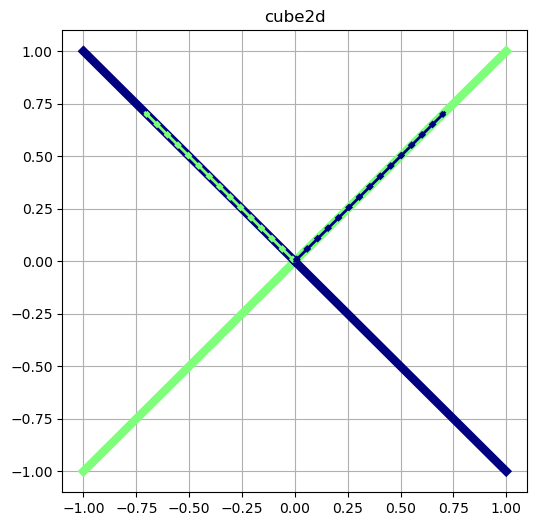

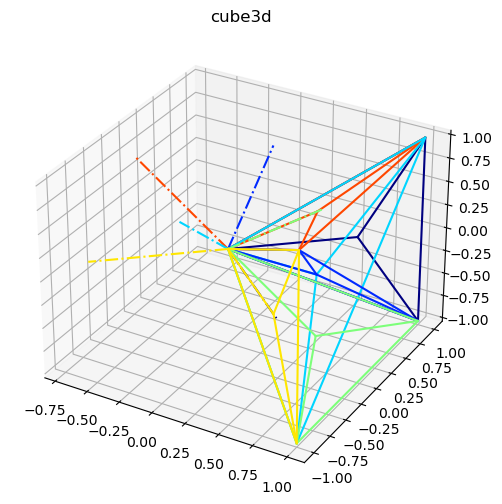

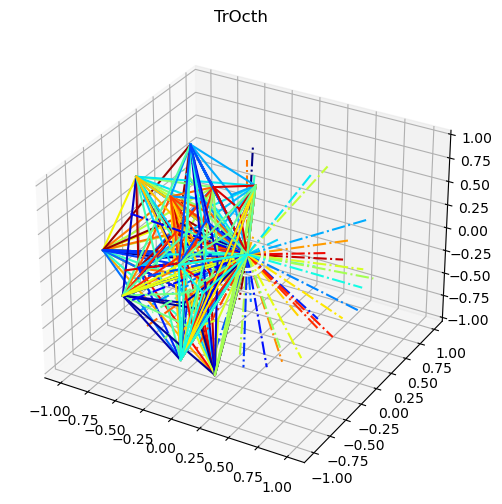

In [7]:
#%matplotlib notebook

cmap = cm.jet

for key in figures:
    figure = figures[key]
    dim = figure.shape[-1]
    normals_key = normals[key]
    colors = [cmap(i/len(normals_key)) for i in range(len(normals_key))]
    np.random.shuffle(colors)
    hyperspaces = hspaces[key]
    if dim == 2:
        plt.figure(figsize=(6, 6))
        plt.title(key)
        for i in range(len(normals_key)):
            hyperspace = hyperspaces[i]
            for hspc in hyperspace:
                p = figure[hspc]
                x = [0, p[0]]
                y = [0, p[1]]
                plt.plot(x, y, linewidth=6, color=colors[i])
        for i in range(len(normals_key)):
            normal = normals_key[i]
            plt.plot([0, normal[0]], [0, normal[1]], color=colors[i], linewidth=4, linestyle=':')
            plt.plot([0, normal[0]], [0, normal[1]], color=colors[i], linewidth=2, linestyle='-')
        plt.grid(True)
        plt.show()
    if dim == 3:
        ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')
        ax.set_title(key)
        for i in range(len(normals_key)):
            matrix = matrices[key][i]
            x = np.append(matrix[:, 0], matrix[0, 0])
            y = np.append(matrix[:, 1], matrix[0, 1])
            z = np.append(matrix[:, 2], matrix[0, 2])
            ax.plot3D(x, y, z, color=colors[i])
            center = matrix.mean(axis=0)
            for k in range(3):
                x = [center[0], matrix[k, 0]]
                y = [center[1], matrix[k, 1]]
                z = [center[2], matrix[k, 2]]
                ax.plot3D(x, y, z, color=colors[i])
            normal = normals_key[i]
            x = [0, normal[0]]
            y = [0, normal[1]]
            z = [0, normal[2]]
            ax.plot3D(x, y, z, color=colors[i], linestyle='-.')
        plt.show(ax)

In [8]:
refs = {}
for key in figures:
    figure = figures[key]
    hspace = hspaces[key]
    lengths = np.array([len(hspc) for hspc in hspace])
    normal = normals[key][np.where(lengths == max(lengths))[0][0]]
    half = halfs[key]
    
    clock = time.perf_counter()
    ref = geometry.reflect(half, normal)
    clock = time.perf_counter() - clock
    refs.update({key : ref})
    print("Half for {0} has been reflected in {1:.4f} seconds.".format(key, clock))

print('\nReflections of halfs I got:')
for key in halfs:
    print(f'{key}: Dimension: {refs[key].shape[1]}; Vertices: {refs[key].shape[0]}')
    
assert [refs[key].shape[0] for key in refs] == [halfs[key].shape[0] for key in halfs]

Half for cube2d has been reflected in 0.0001 seconds.
Half for cube3d has been reflected in 0.0000 seconds.
Half for TrOcth has been reflected in 0.0000 seconds.
Half for cube4d has been reflected in 0.0000 seconds.

Reflections of halfs I got:
cube2d: Dimension: 2; Vertices: 3
cube3d: Dimension: 3; Vertices: 6
TrOcth: Dimension: 3; Vertices: 16
cube4d: Dimension: 4; Vertices: 12


In [9]:
for key in refs:
    print(f"Figure: {key}")
    half_key = halfs[key].astype(float)
    refs_key = refs[key]
    n = str(half_key).find('\n') + 2
    sf = "{0:" + str(n) + "s}{1:"+str(n) + "s}"
    print(sf.format('Half', 'Reflection'))
    for i in range(len(half_key)):
        print(sf.format(str(half_key).split('\n')[i], 
              str(refs_key).split('\n')[i]))
    print()

Figure: cube2d
Half        Reflection  
[[ 1.  1.]  [[ 1.  1.]  
 [ 1. -1.]   [-1.  1.]  
 [-1. -1.]]  [-1. -1.]] 

Figure: cube3d
Half            Reflection      
[[ 1.  1.  1.]  [[ 1.  1.  1.]  
 [ 1.  1. -1.]   [ 1.  1. -1.]  
 [-1.  1.  1.]   [ 1. -1.  1.]  
 [-1.  1. -1.]   [ 1. -1. -1.]  
 [-1. -1.  1.]   [-1. -1.  1.]  
 [-1. -1. -1.]]  [-1. -1. -1.]] 

Figure: TrOcth
Half               Reflection         
[[-1.  -0.5  0. ]  [[-1.  -0.5  0. ]  
 [-1.   0.  -0.5]   [-1.   0.   0.5]  
 [-1.   0.5  0. ]   [-1.   0.5  0. ]  
 [-0.5 -1.   0. ]   [-0.5 -1.   0. ]  
 [-0.5  0.  -1. ]   [-0.5  0.   1. ]  
 [-0.5  1.   0. ]   [-0.5  1.   0. ]  
 [ 0.  -1.  -0.5]   [ 0.  -1.   0.5]  
 [ 0.  -0.5 -1. ]   [ 0.  -0.5  1. ]  
 [ 0.   0.5 -1. ]   [ 0.   0.5  1. ]  
 [ 0.   1.  -0.5]   [ 0.   1.   0.5]  
 [ 0.5 -1.   0. ]   [ 0.5 -1.   0. ]  
 [ 0.5  0.  -1. ]   [ 0.5  0.   1. ]  
 [ 0.5  1.   0. ]   [ 0.5  1.   0. ]  
 [ 1.  -0.5  0. ]   [ 1.  -0.5  0. ]  
 [ 1.   0.  -0.5]   [ 1.   0.   0.5] 

In [10]:
half_unions = {}
for key in figures:
    half_unions.update({key : np.unique(np.concatenate([halfs[key], refs[key]]), axis=0)})
    
print('Unions of halfs')
for key in half_unions:
    print(f'{key}: Dimension: {half_unions[key].shape[1]}; Vertices: {half_unions[key].shape[0]}')
    
for key in figures:
    try:
        assert (np.sort(figures[key], axis=0) == np.sort(half_unions[key], axis=0)).all()
    except AssertionError:
        print()
        print(f"Something is wrong for figure {key}:")
        print(f"figures['{key}']:\n{figures[key]}")
        print(f"half_unions['{key}']:\n{half_unions[key]}")

Unions of halfs
cube2d: Dimension: 2; Vertices: 4
cube3d: Dimension: 3; Vertices: 8
TrOcth: Dimension: 3; Vertices: 24
cube4d: Dimension: 4; Vertices: 16


In [11]:
faces = {}
for key in figures:
    figure = figures[key]
    clock = time.perf_counter()
    faces_key = geometry.get_faces(figure)
    clock = time.perf_counter() - clock
    faces.update({key : faces_key})
    print("Faces for {0} has been reflected in {1:.4f} seconds.".format(key, clock))

print('\nFaces shapes I got:')
for key in faces:
    lengths = np.array([len(face) for face in faces[key]])
    len_str = len(f"There are {len(faces[key])} in figure {key}: ")
    s = (';\n' + ' '*len_str).join([str((lengths == i).sum()) + ' faces with ' + str(i) + ' vertices' for i in np.unique(lengths)])
    print(f"There are {len(faces[key])} in figure {key}: " + s + '.')

Faces for cube2d has been reflected in 0.0010 seconds.
Faces for cube3d has been reflected in 0.0043 seconds.
Faces for TrOcth has been reflected in 0.3806 seconds.
Faces for cube4d has been reflected in 0.1529 seconds.

Faces shapes I got:
There are 4 in figure cube2d: 4 faces with 2 vertices.
There are 6 in figure cube3d: 6 faces with 4 vertices.
There are 14 in figure TrOcth: 6 faces with 4 vertices;
                               8 faces with 6 vertices.
There are 8 in figure cube4d: 8 faces with 8 vertices.


In [12]:
np.array([face for face in faces['cube4d']])

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 0,  1,  2,  3,  8,  9, 10, 11],
       [ 0,  1,  4,  5,  8,  9, 12, 13],
       [ 0,  2,  4,  6,  8, 10, 12, 14],
       [ 1,  3,  5,  7,  9, 11, 13, 15],
       [ 2,  3,  6,  7, 10, 11, 14, 15],
       [ 4,  5,  6,  7, 12, 13, 14, 15],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

In [13]:
opposite_faces = {}
for key in figures:
    figure = figures[key]
    clock = time.perf_counter()
    of_pairs, of_normals = geometry.get_opposite_faces(figure)
    clock = time.perf_counter() - clock
    opposite_faces.update({key : {'pairs' : of_pairs, 
                                  'normals' : np.array(of_normals)}})
    print("Faces for {0} has been reflected in {1:.4f} seconds.".format(key, clock))
    
    
print('\nPairs I got:')
for key in opposite_faces:
    print(f"For figure {key} I got {len(opposite_faces[key]['pairs'])} pairs of opposite faces, so opposite_faces[{key.__repr__()}]['normals'].shape is {opposite_faces[key]['normals'].shape}.")

Faces for cube2d has been reflected in 0.0022 seconds.
Faces for cube3d has been reflected in 0.0061 seconds.
Faces for TrOcth has been reflected in 0.4342 seconds.
Faces for cube4d has been reflected in 0.1727 seconds.

Pairs I got:
For figure cube2d I got 2 pairs of opposite faces, so opposite_faces['cube2d']['normals'].shape is (2, 2).
For figure cube3d I got 3 pairs of opposite faces, so opposite_faces['cube3d']['normals'].shape is (3, 3).
For figure TrOcth I got 7 pairs of opposite faces, so opposite_faces['TrOcth']['normals'].shape is (7, 3).
For figure cube4d I got 4 pairs of opposite faces, so opposite_faces['cube4d']['normals'].shape is (4, 4).


In [14]:
pair_distances = {}
for key in opposite_faces:
    figure = figures[key]
    dim = figure.shape[-1]
    pairs = [figure[np.array(pair, dtype=int)] for pair in opposite_faces[key]['pairs']]
    distances = []
    clock = time.perf_counter()
    for hspc_a, hspc_b in pairs:
        for comb in itertools.combinations(np.arange(len(hspc_a)), dim):
            if np.linalg.matrix_rank(hspc_a[np.array(comb)]) == dim:
                matrix_a = hspc_a[np.array(comb)]
                break
        for comb in itertools.combinations(np.arange(len(hspc_b)), dim):
            if np.linalg.matrix_rank(hspc_b[np.array(comb)]) == dim:
                matrix_b = hspc_b[np.array(comb)]
                break
        distance = geometry.get_distance_between_hyperspaces(matrix_a, matrix_b)
        distances.append(distance)
    clock = time.perf_counter() - clock
    print("All disctances for {0} pairs has been calculated in {1:.4f} seconds.".format(key, clock))
    pair_distances.update({key : distances})
pair_distances

ic| matrix_a.shape: (2, 2), matrix_b.shape: (2, 2)
ic| matrix: array([[-1,  1],
                   [-1, -1]])
    point: array([1, 1])
    vector: array([ 1., -0.])
ic| minor.shape: (1, 1)
ic| minor: -1.0
ic| minor.shape: (1, 1)
ic| minor: 1.0
ic| m: array([[ 1.,  0.,  1.],
              [ 0.,  1., -0.],
              [-1.,  1.,  0.]])
    r: array([1., 1., 0.])
ic| x: array([1., 1.])
ic| matrix_a.shape: (2, 2), matrix_b.shape: (2, 2)
ic| matrix: array([[ 1, -1],
                   [-1, -1]])
    point: array([1, 1])
    vector: array([ 0., -1.])
ic| minor.shape: (1, 1)
ic| minor: -1.0
ic| minor.shape: (1, 1)
ic| minor: 1.0
ic| m: array([[ 1.,  0.,  0.],
              [ 0.,  1., -1.],
              [-1.,  1.,  0.]])
    r: array([1., 1., 0.])
ic| x: array([1., 1.])
ic| matrix_a.shape: (3, 3), matrix_b.shape: (3, 3)
ic| matrix: array([[-1,  1,  1],
                   [-1,  1, -1],
                   [-1, -1,  1]])
    point: array([1, 1, 1])
    vector: array([ 1., -0., -0.])
ic| minor.

All disctances for cube2d pairs has been calculated in 0.3549 seconds.


LinAlgError: Singular matrix

In [15]:
pair_distances

{'cube2d': [0.0, 0.0]}

# Triangulation

In [ ]:
triangulations_simple = {}
for key in figures:
    figure = figures[key]
    clock = time.perf_counter()
    tri = triangulation.triangulate_body(figure)
    clock = time.perf_counter() - clock
    triangulations_simple.update({key : tri.copy()})
    print("Triangulation for {0} has been calculated in {1:.4f} seconds.".format(key, clock))
    
print()
for key in normals:
    print(f"triangulations_simple[{key.__repr__()}].shape = {triangulations_simple[key].shape}")

In [ ]:
cmap = cm.jet
eps = 0.03

for key in triangulations_simple:
    tri = triangulations_simple[key]
    dim = tri.shape[-1]
    
    centers = np.array([simplex.mean(axis=0) for simplex in tri])
    moves = eps*centers
    colors = [cmap(i/len(tri)) for i in range(len(tri))]
    
    if dim == 2:
        plt.figure(figsize=(6, 6))
        plt.title(key)
        for i in range(len(tri)):
            simplex = tri[i] + moves[i]
            color = colors[i]
            x = np.append(simplex[:, 0], simplex[0, 0])
            y = np.append(simplex[:, 1], simplex[0, 1])
            plt.plot(x, y, color=color, linewidth=3*(2-i))
        plt.grid(True)
        plt.show()
    if dim == 3:
        ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')
        ax.set_title(key)
        for i in range(len(tri)):
            simplex = tri[i] + moves[i]
            color = colors[i]
            for edge in itertools.combinations(simplex, 2):
                xyz = np.array(edge)
                ax.plot3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], color=color, linewidth=2)
        plt.show(ax)

In [ ]:
triangulations_ref = {}
for key in figures:
    figure = figures[key]
    clock = time.perf_counter()
    tri = triangulation.triangulate_body_reflecting_half(figure)
    clock = time.perf_counter() - clock
    triangulations_ref.update({key : tri.copy()})
    print("Triangulation for {0} has been calculated in {1:.4f} seconds.".format(key, clock))
    
print()
for key in normals:
    print(f"triangulations_ref[{key.__repr__()}].shape = {triangulations_ref[key].shape}")

In [ ]:
cmap = cm.jet
eps = 0.03

for key in triangulations_ref:
    tri = triangulations_ref[key]
    dim = tri.shape[-1]
    
    centers = np.array([simplex.mean(axis=0) for simplex in tri])
    moves = eps*centers
    colors = [cmap(i/len(tri)) for i in range(len(tri))]
    
    if dim == 2:
        plt.figure(figsize=(6, 6))
        plt.title(key)
        for i in range(len(tri)):
            simplex = tri[i] + moves[i]
            color = colors[i]
            x = np.append(simplex[:, 0], simplex[0, 0])
            y = np.append(simplex[:, 1], simplex[0, 1])
            plt.plot(x, y, color=color, linewidth=3*(2-i))
        plt.grid(True)
        plt.show()
    if dim == 3:
        ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')
        ax.set_title(key)
        for i in range(len(tri)):
            simplex = tri[i] + moves[i]
            color = colors[i]
            for edge in itertools.combinations(simplex, 2):
                xyz = np.array(edge)
                ax.plot3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], color=color, linewidth=2)
        plt.show(ax)

Как мы видим на примере куба трёхмерного, у двух пар противоположных сторон не совпадает проекция при использовании отражений. Грустно.

Нужно будет функции проверки о противоположных гранях написать. Можно для триангуляции $T$ реализовать так:

1. Найти все нормали $n_i$ внешних плоскостей
2. Проверить, $S_{n_i}T = T$?

или

1. Найти все пары $\alpha_i, \beta_i$ противоположных внешних плоскостей
2. Посчитать нормали $n_i$ для этих плоскостей
3. Найти симплициальные разбиентя $T(\alpha_i), T(\beta_i)$ для всех пар плоскостей $\alpha_i, \beta_i$ - т.е. все симплексы $T$, лежащие в $\alpha_i$ и $\beta_i$
4. Проверить, $S_{ni}(T(\alpha_i) \cup T(\beta_i)) = T(\alpha_i) \cup T(\beta_i)$

В обоих случаях нужно реализвать метод сравнения разбиений на симплексы одного и того же облака точек.

Для двух симплицальных разбиений одного и того же облака $T_1$ и $T_2$ можно попробовать так:
1. Привести его к типу `float`
2. Отсортировать каждый симплекс и привести к типу `string`
3. Отсартировать массивы строк и сравнить их

In [ ]:
face_triangulations = {}
for key in figures:
    face_triangulations.update({key : []})
    figure = figures[key]
    dim = figure.shape[1]
    tri = triangulations_ref[key]
    matrices = [figure[np.array(face, dtype=int)] for face in faces[key]]
    for i in range(len(matrices)):
        for comb in itertools.combinations(np.arange(len(matrices[i])), dim):
            if np.linalg.matrix_rank(matrices[i][np.array(comb)]) == dim:
                matrices[i] = matrices[i][np.array(comb)]
                break;
    for i in range(len(matrices)):
        matrix = matrices[i]
        clock = time.perf_counter()
        new_triangulation = triangulation.get_subcomplex(tri, matrix)
        clock = time.perf_counter() - clock
        print("Subcomplex on face {0} of figure {1} found in {2:.4f} seconds.".format(i, key, clock))
        face_triangulations[key].append(new_triangulation.copy())
    print()

for key in face_triangulations:
    ftk = face_triangulations[key]
    shapes = np.array([i.shape for i in ftk])
    lengths = shapes[:, 0]
    s0 = f"There were {len(lengths)} faces of figure {key} triangulated: "
    s1 = (';\n' + ' '*len(s0)).join(["{0} faces contains {1} simplices".format((lengths == i).sum(), i) for i in np.unique(lengths)])
    print(s0 + s1)

In [ ]:
cmap = cm.jet

for key in triangulations_ref:
    tris = face_triangulations[key]
    dim = figures[key].shape[-1]
    colors = [cmap(i/len(tris)) for i in range(len(tris))]
    
    if dim == 2:
        plt.figure(figsize=(6, 6))
        plt.title(key)
        for i in range(len(tris)):
            tri = tris[i]
            col = colors[i]
            
            for simplex in tri:
                for p0, p1 in itertools.combinations(simplex, 2):
                    x = [p0[0], p1[0]]
                    y = [p0[1], p1[1]]
                    plt.plot(x, y, color=col, linewidth=4)
        plt.grid(True)
        plt.show()
    if dim == 3:
        ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')
        ax.set_title(key)
        for i in range(len(tris)):
            tri = tris[i]
            col = colors[i]
            for simplex in tri:
                for p0, p1 in itertools.combinations(simplex, 2):
                    x = [p0[0], p1[0]]
                    y = [p0[1], p1[1]]
                    z = [p0[2], p1[2]]
                    ax.plot3D(x, y, z, color=col, linewidth=2)
        plt.show(ax)

In [ ]:
equal_ss = {}
equal_sr = {}
equal_rr = {}

for key in figures:
    tri_s = triangulations_simple[key]
    tri_r = triangulations_ref[key]
    clock = time.perf_counter()
    status = triangulation.equal_triangulations(tri_s, tri_s)
    clock = time.perf_counter() - clock
    equal_ss.update({key : status})
    print("In {0:0.4f} seconds calcualted the value of triangulations_ref['{1}'] == triangulations_ref['{1}']".format(clock, key))
    clock = time.perf_counter()
    status = triangulation.equal_triangulations(tri_s, tri_r)
    clock = time.perf_counter() - clock
    equal_sr.update({key : status})
    print("In {0:0.4f} seconds calcualted the value of triangulations_ref['{1}'] == triangulations_sim['{1}']".format(clock, key))
    clock = time.perf_counter()
    status = triangulation.equal_triangulations(tri_r, tri_r)
    clock = time.perf_counter() - clock
    equal_rr.update({key : status})
    print("In {0:0.4f} seconds calcualted the value of triangulations_sim['{1}'] == triangulations_sim['{1}']".format(clock, key))

sign_dict = {True: '==', False: '!='}
print('\nResult:')
for key in figures:
    print(f"triangulations_sim[{key.__repr__()}] {sign_dict[equal_ss[key]]} triangulations_sim[{key.__repr__()}]")
    print(f"triangulations_sim[{key.__repr__()}] {sign_dict[equal_sr[key]]} triangulations_ref[{key.__repr__()}]")
    print(f"triangulations_ref[{key.__repr__()}] {sign_dict[equal_rr[key]]} triangulations_ref[{key.__repr__()}]")

In [ ]:
is_symmetric_simple = {}
for key in triangulations_simple:
    tri = triangulations_simple[key]
    clock = time.perf_counter()
    status = triangulation.is_symmetric(tri)
    clock = time.perf_counter() - clock
    refs.update({key : ref})
    print("Status for {0} simple triangulation has been calculated in {1:.4f} seconds.".format(key, clock))
    is_symmetric_simple.update({key : status})
    
is_symmetric_ref = {}
for key in triangulations_ref:
    tri = triangulations_ref[key]
    clock = time.perf_counter()
    status = triangulation.is_symmetric(tri)
    clock = time.perf_counter() - clock
    refs.update({key : ref})
    print("Status for {0} reflected triangulation has been calculated in {1:.4f} seconds.".format(key, clock))
    is_symmetric_ref.update({key : status})

pd.DataFrame({'triangulations_simple' : is_symmetric_simple, 
              'triangulations_ref' : is_symmetric_ref})

The results of `is_symmetric` looks questionably.